<a href="https://colab.research.google.com/github/RA2112702010007AD/MS-AI-AICTE-Project/blob/main/AI-Project(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q nltk scikit-learn matplotlib seaborn wordcloud

**Step 1:Import Libraries**

In [22]:
!pip install -q nltk scikit-learn matplotlib seaborn wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Step 2: Load Dataset**

In [23]:
from google.colab import files
uploaded = files.upload()  # Upload your CSV with columns: asin, helpful, overall, reviewText, etc.

df = pd.read_csv(next(iter(uploaded)))
df = df[['asin', 'helpful', 'overall', 'reviewText', 'summary']]  # Select relevant columns
df.dropna(inplace=True)
df.head()

Saving amazon_reviews.csv to amazon_reviews.csv


,asin,helpful,overall,reviewText,summary
0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,Gotta have GPS!
1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...",Very Disappointed
2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...",1st impression
3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","Great grafics, POOR GPS"
4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"Major issues, only excuses for support"


**Step 3: Clean & Label Data**

In [24]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

df['text'] = (df['summary'] + " " + df['reviewText']).apply(clean_text)

def label_sentiment(rating):
    if rating >= 4: return 'positive'
    elif rating == 3: return 'neutral'
    else: return 'negative'

df['sentiment'] = df['overall'].apply(label_sentiment)


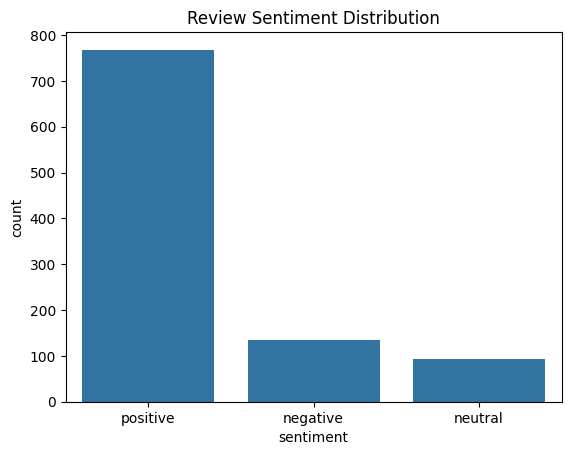

In [26]:
sns.countplot(data=df, x='sentiment')
plt.title('Review Sentiment Distribution')
plt.show()

**Step 4: Handle Class Imbalance**

In [25]:
from sklearn.utils import resample

df_major = df[df['sentiment'] == 'positive']
df_minor = df[df['sentiment'] != 'positive']
df_minor_upsampled = resample(df_minor,
                              replace=True,
                              n_samples=len(df_major),
                              random_state=42)
df_balanced = pd.concat([df_major, df_minor_upsampled])

**Step 5: TF-IDF + Logistic Regression**

In [28]:
X = df_balanced['text']
y = df_balanced['sentiment']

vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1,2))
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

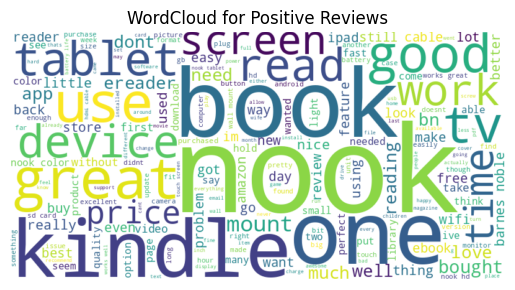

In [9]:
positive_text = ' '.join(df[df['sentiment'] == 'positive']['clean_text'])
wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Positive Reviews")
plt.show()

**Step 6: Evaluation**

Accuracy: 0.922077922077922
              precision    recall  f1-score   support

    negative       0.98      0.97      0.97        93
     neutral       0.98      0.71      0.82        62
    positive       0.88      0.98      0.93       153

    accuracy                           0.92       308
   macro avg       0.94      0.89      0.91       308
weighted avg       0.93      0.92      0.92       308



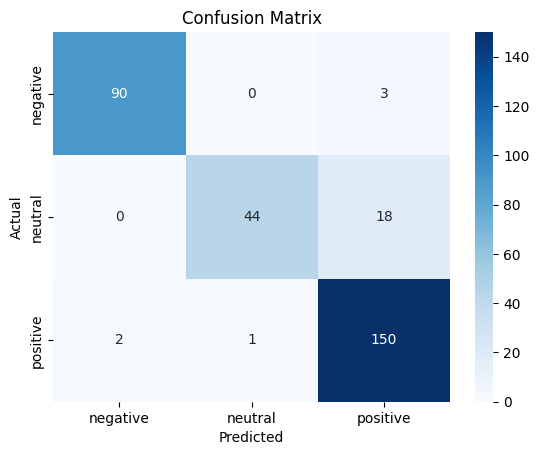

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Step 7: Product Insights**

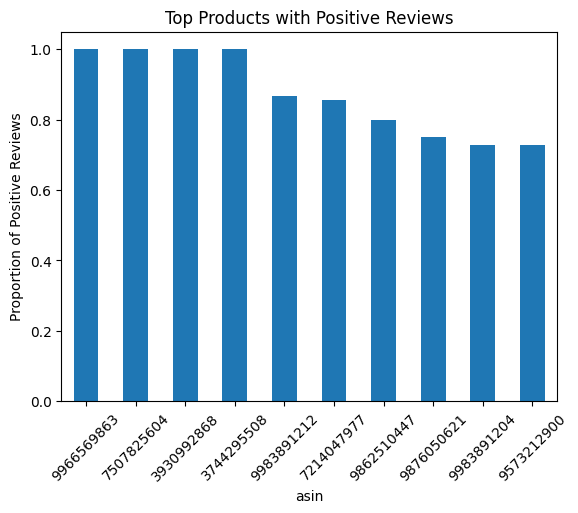

In [30]:
product_sentiment = df_balanced.groupby('asin')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
top_positive = product_sentiment.sort_values(by='positive', ascending=False).head(10)

top_positive[['positive']].plot(kind='bar', legend=False)
plt.title("Top Products with Positive Reviews")
plt.ylabel("Proportion of Positive Reviews")
plt.xticks(rotation=45)
plt.show()

**Step 8: Real-Time Prediction**

In [31]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    return logreg.predict(vec)[0]

predict_sentiment("I loved this product! High quality and easy to use.")

'positive'

In [33]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    return logreg.predict(vec)[0]

predict_sentiment("I am very disappointed")


'negative'

In [34]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    return logreg.predict(vec)[0]

predict_sentiment("As expected")

'positive'

In [ ]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    return logreg.predict(vec)[0]

predict_sentiment("I am very disappointed")

In [35]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    return logreg.predict(vec)[0]

predict_sentiment("Good price, Good deal")

'positive'